PKT: (4.0000e+00, 4.0000e+00) WARTOSC: 3.2000e+01 GRADIENT: (8.0000e+00, 8.0000e+00)
PKT: (1.6000e+00, 1.6000e+00) WARTOSC: 5.1200e+00 GRADIENT: (3.2000e+00, 3.2000e+00)
PKT: (6.4000e-01, 6.4000e-01) WARTOSC: 8.1920e-01 GRADIENT: (1.2800e+00, 1.2800e+00)
PKT: (2.5600e-01, 2.5600e-01) WARTOSC: 1.3107e-01 GRADIENT: (5.1200e-01, 5.1200e-01)
PKT: (1.0240e-01, 1.0240e-01) WARTOSC: 2.0972e-02 GRADIENT: (2.0480e-01, 2.0480e-01)
PKT: (4.0960e-02, 4.0960e-02) WARTOSC: 3.3554e-03 GRADIENT: (8.1920e-02, 8.1920e-02)
PKT: (1.6384e-02, 1.6384e-02) WARTOSC: 5.3687e-04 GRADIENT: (3.2768e-02, 3.2768e-02)
PKT: (6.5536e-03, 6.5536e-03) WARTOSC: 8.5899e-05 GRADIENT: (1.3107e-02, 1.3107e-02)
WYNIK:
PKT: (2.6214e-03, 2.6214e-03)| WARTOSC: 1.3744e-05


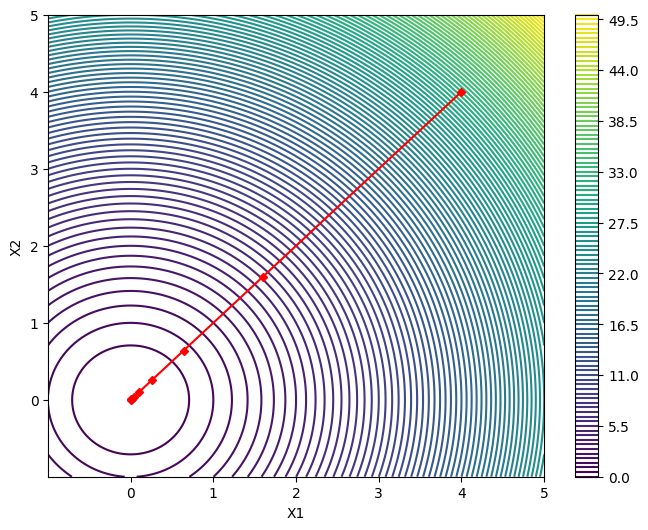

In [1]:

import numpy as np
import matplotlib.pyplot as plt

def visualise_method(f, points):
    # Convert points to numpy array for plotting
    points = np.array(points)

    # Determine the range for the mesh grid based on the points
    x1_min, x1_max = points[:, 0].min() - 1, points[:, 0].max() + 1
    x2_min, x2_max = points[:, 1].min() - 1, points[:, 1].max() + 1

    # Generate grid for contour plot based on the range of points
    x1 = np.linspace(x1_min, x1_max, 400)
    x2 = np.linspace(x2_min, x2_max, 400)
    X1, X2 = np.meshgrid(x1, x2)
    Z = f((X1, X2))

    # Create a figure
    fig, ax = plt.subplots(figsize=(8, 6))

    # Create a contour plot
    cp = ax.contour(X1, X2, Z, levels=100, cmap='viridis')
    fig.colorbar(cp)

    # Adjust plot limits based on visited points
    ax.set_xlim([x1_min, x1_max])
    ax.set_ylim([x2_min, x2_max])

    # Plot the points and their path
    points_T = points.T
    ax.plot(*points_T, color='red', marker='D', linestyle='-', markersize=4)

    # Set labels
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')

    # Show the plot
    plt.show()

def e(tupl):
    result = "("
    for x in tupl:
        result += f"{x:.4e}, "
    return result.rstrip(", ") + ")"

def dlg_wektora(pkt):
    sum = 0
    for i in range(len(pkt)):
        sum += pkt[i]**2
    return sum ** 0.5

def stalokrokowa(punkt_startowy, kryterium_stopu, f, gradient, dlugosc_kroku):
    pkt = punkt_startowy
    points = [pkt]

    while True:
        wartosc_gradientu = gradient(pkt)
        next_pkt = tuple([x - dlugosc_kroku * gx for x, gx in zip(pkt, wartosc_gradientu)])
        
        print(f"PKT: {e(pkt)} WARTOSC: {f(pkt):.4e} GRADIENT: {e(wartosc_gradientu)}")
        if abs(dlg_wektora(pkt) - dlg_wektora(next_pkt)) < kryterium_stopu:
            pkt = next_pkt
            points.append(pkt)
            break
        
        pkt = next_pkt
        points.append(pkt)

    print("WYNIK:")
    print(f"PKT: {e(pkt)}| WARTOSC: {f(pkt):.4e}")

    visualise_method(f, points)


def zmiennokrokowa(punkt_startowy, kryterium_stopu, f, gradient, sigma, beta, alpha_init):
    pkt = punkt_startowy
    points = [pkt]

    while True:
        wartosc_gradient = gradient(pkt)
        alpha = alpha_init
        
        # magia Armijo condition
        while f(tuple([x - alpha * gx for x, gx in zip(pkt, wartosc_gradient)])) > f(pkt) - sigma * alpha * sum(g**2 for g in wartosc_gradient):
            alpha *= beta
        
        next_pkt = tuple([x - alpha * gx for x, gx in zip(pkt, wartosc_gradient)])
        
        print(f"PKT: {e(pkt)} WARTOSC: {f(pkt):.4e} GRADIENT: {e(wartosc_gradient)} KROK: {alpha:.4e}")
        if abs(dlg_wektora(pkt) - dlg_wektora(next_pkt)) < kryterium_stopu:
            pkt = next_pkt
            points.append(pkt)
            break
        
        pkt = next_pkt
        points.append(pkt)

    print("WYNIK:")
    print(f"PKT: {e(pkt)} | WARTOSC: {f(pkt):.4e}")

    visualise_method(f, points)

if __name__ == '__main__':
    
    punkt_startowy = (4, 4)
    kryterium_stopu = 10 ** (-2)
    f = lambda x: x[0]**2 + x[1]**2
    gradient = lambda x: (2*x[0], 2*x[1])

    dlugosc_kroku = 0.3
    stalokrokowa(punkt_startowy, kryterium_stopu, f, gradient, dlugosc_kroku)

    # Bawić się zmiennymi dla polepszenia wyniku
    # sigma = 0.4
    # beta = 0.7
    # alpha_init = 0.5
    # zmiennokrokowa(punkt_startowy, kryterium_stopu, f, gradient, sigma, beta, alpha_init)